<a href="https://colab.research.google.com/github/jacobshk/FutureMakers2022/blob/main/Day_3_Intro_to_Deep_Learning_JS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

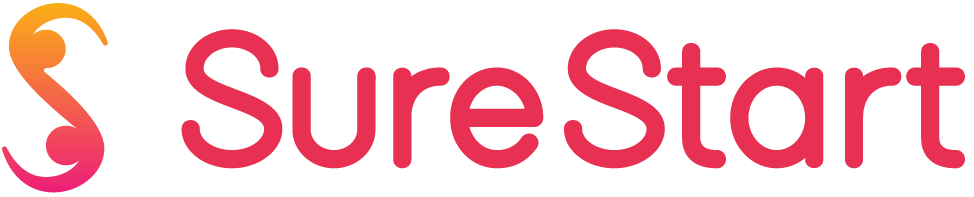

#Day 3 Objectives:
* To familiarize you with the differences between AI, Machine Learning, and Deep Learning. 
* To introduce you to Deep Learning models and algorithms.


**Note**: In case of errors which suggest restarting the runtime, restarting runtime via the button on the comments will solve the error. Or you can also go to *Runtime > Restart Runtime*.

### Google Colabratory 
is a virtual coding environment, within which many useful libraries have already been installed. If we want to install newer or different versions of the ones already installed, there can be version conflicts. But these conflicts may be resolved by restarting the runtime.


In [1]:
# Any python code script to be run in a cell should be written just as so
# And any terminal commands to be run is preceeded by a "!" 
!pip install imgaug==0.2.5

! pip install matplotlib --upgrade
! pip install --upgrade numpy
! pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 562 kB 13.2 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=bbb812bc4a00f6e6955ec9a21937c782d65d5b36ac15322e393baaccf45c0e97
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 8.8 MB/s 
     |████████████████████████████████| 944 kB 60.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 14.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [1]:
# Importing libraries as aliases is done in the following manner
# import Library as Lib

# Numpy is used to perform mathematical operations on matrixes
import numpy as np

# Matplotlib is a visualization library  
import matplotlib.pyplot as plt

#Data Creation
Let's start by creating an interesting dataset, referred to as an XOR data.

In [2]:
# data is an array which represents 4 different data clusters
data = []
# target holds information about which class each respective data points are from
target = []

# Here we are just instantiating random points at 4 different places in the graph space
for i in range(2):
    for j in range(2):
        for _ in range(100):
            if (i+j)%2==0:
                data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1) + j])
                target.append([0])
            else:  
                data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1)+ j] )
                target.append([1])


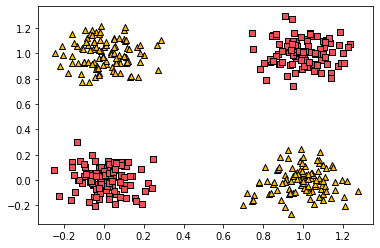

In [3]:
# Visualizing the data; plt.scatter creates a scatter plot

for i in range(len(data)):
    if target[i][0] == 0:
        plt.scatter(data[i][0] ,data[i][1] , c='#F15156', marker = 's', edgecolor = 'black')
    else:
        plt.scatter(data[i][0] ,data[i][1] , c='#FFBD00', marker = '^', edgecolor = 'black')

plt.show()

In [4]:
# Next, we recast the python lists above as np.array because
# NumPy arrays are faster and more compact than python lists.
# Here we prepare two arrays of the data we created for ease of use 
# as a dataset for the machine learning model we will use

data = np.array(data)
print("Shape of the input data", data.shape)

target = np.array(target)
print("Shape of the output data", target.shape)

Shape of the input data (400, 2)
Shape of the output data (400, 1)


# Linear Machine Learning models
Linear models are the simplest of machine learning models that are based on estimating the "line of best fit" through the data that is provided.

Intuitively, this simply means answering the question: is there a line that will best summarize or separate this data?

In [5]:
# Scikit-Learn is a Python library which has higher-level 
# implementations of many machine learning algorithms.
# Scikit-Learn makes it easy to define a machine learning model 
# and then fit it to given data.
from sklearn.linear_model import LinearRegression

## Linear Regression Example

Let's build a linear regression model and "fit" it to the XOR data we defined above.

In the block below, `reg` is our model definition.

(A similar syntax can be used to define other classification or clustering using the sklearn library. You will see it being used below when we explore two other linear models: `perceptron` for classification; and `K-means` for clustering.)

In [6]:
reg = LinearRegression().fit(data, target)
print(reg.score(data, target))
print(reg.coef_)
print(reg.intercept_)

5.995733980801443e-05
[[-0.00247566 -0.00714162]]
[0.50481072]


## Question 1

Check out the Linear Regression [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and explain what do `.score()`, `.coef_`, and `.intercept_` in the above cell mean?

Score is an indication of how well the model fits the data, akin to R^2 in math. A score of 1 is perfect.

Linear regression attempts to create a line of best fit for various datapoints. Different coefficients can be applied to each datum to minimize the distance between that datapoint and the line of best fit. Coef returns the optimal coeffiicent for each datum. 

intercept is the y-intercept of the LOBF.

## Visualization

The code block below will visualize how well the linear regressor can separate the four classes we created.

In a linear regression task, a line is used to separate a plane in two parts. This works very well if the data is linearly separable. See below and note that our data may not be as as easily summarized or separable with a single line --- casting doubt on whether a linear regressor such as a perceptron or a linear regression model may be able to succesfully model a dataset such as this.

Note that sometimes given data may not be separable in the original feature space but there are tricks that can transform the data into another feature spaces, which can be LINEARLY separable.



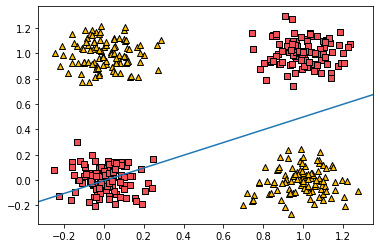

In [7]:
for i in range(len(data)):  
    plt.scatter(data[i][0], data[i][1], c=['#F15156', '#FFBD00'][target[i][0]], edgecolors='black', marker=['s', '^'][target[i][0]])

# The plot makes it obvious 
# that this method does not classify the dataset properly into its classes
# Before we expound on it, lets look at the perceptron, 
# or as we can also say, the earliest neural unit made    

plt.axline(reg.coef_[0], slope = reg.intercept_)

# Clustering

Clustering is an unsupervised learning method, where we use the input data itself (without any supervision or guidance from any target data) to "cluster" or bundle together "close" data, where "close" is defined by the clustering function used.

Let's try [K-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), which is also a linear algorithm (aka based on determining the line of best fit), to see how it clusters this dataset. (You can also explore another clustering algorithm [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on your own.)

In [8]:
from sklearn.cluster import KMeans

Two things of note:

First, compare the output visualization to the original plot of the XOR dataset above. Consider the shape-color combinations of the original; note that the clusters on the diagonals were intended to be close clusters by us as indicated by the similarily of color and shape. Now note the clusters that were the outcome of the KMeans model: the two data subsets of on the left side of the plot are considered as one cluster by algorithm, and the two data subsets on the right side of the plot as another cluster. This illustrates that unsupervised clustering algorithms like KMeans may cluster the data well but we do not have any say in which clusters are bundled together. 

Second, note the parameter ``n_clusters`` in the definition of KMeans model below. It determines how many clusters the model will attempt to create. In this case, we chose to create 2 clusters. You can play around with it and create more clusters (if you do, just change the the parameters ``c`` and ``markers`` to match the number of clusters.)



0
1


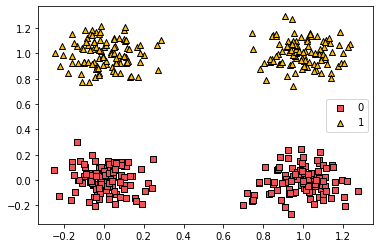

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
label = kmeans.fit_predict(data)

# Getting unique labels
all_labels = np.unique(label)
 
# Plotting the results:
for i in all_labels:
    print(str(i))
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i, c=['#F15156', '#FFBD00'][i], edgecolors='black', marker=['s', '^'][i])
plt.legend()
plt.show()

# KMeans may cluster the data well but as it is an unsupervised task, 
# we do not have any say in which clusters are bundled together

# Perceptron
Emulating the simplified model of the biological neurons in our brain, a perceptron can be considered to be the simplest building block of artificial neural networks. The perceptron algorithm was invented in 1958 by Frank Rosenblatt. 

A perceptron comprises just one neuron. 

A perceptron takes in some numerical `inputs` along with a parallel vector of `weights` assigned to the inputs and numerical factor called a `bias` that is expected to improve estimation accuracy. It then multiplies these inputs with the respective weights producing a `weighted sum`. These products are then added together along with the bias to produce an estimate of the output.

$y = f(x) = ∑\limits_{i=0}^{n} x_n w_n + b_n$

This is similar to how each of the nodes of a layer in an artificial neural network work --- there may be some variations in specific $f(x)$ functions.


In [10]:
# Another way to only load certain modules from a library is 
# from Library import Module

from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


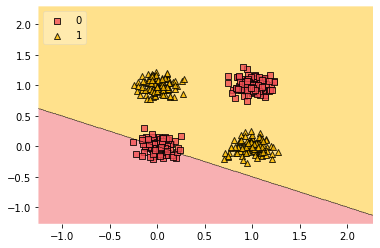

In [11]:
percept =  Perceptron(tol=1e-3, random_state=0)

# A perceptron has many hyperparameters to play around with, 
# we have included hyperparameters you can play with
# percept = Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0, fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
#           penalty=None, random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

percept.fit(data,target)
percept.score(data,target)  

target = target.reshape((-1))
plot_decision_regions(data, target, clf=percept, legend=2,colors = '#F15156,#FFBD00')
plt.show()


As you can see, for this sort of a scatter plot, which is equivalent to an [exclusive-or truth table](https://en.wikipedia.org/wiki/Exclusive_or#Truth_table), classification using any of the linear models above is not very accurate.

The reason is that this dataset cannot be separated by a single linear plane, which is all that a linear regression task is. 

Estimating data like this XOR dataset requires non-linear models, which is why in the upcoming weeks, we will study deep learning models, to add nonlinearity to our models and better approximate real-life use cases.


`## Question 2
Create a dataset* of 4 clusters in the code cell below with the method shown above such that it can be solved by a linear regressor.

You can refer the code cell where the XOR dataset is created. See how the numpy.random function works here: https://numpy.org/doc/1.16/reference/routines.random.html
 

*Include atleast 100 points in the dataset

Hint1: *Relocating the clusters from their original XOR dataset positions may help.* 

Hint2: *Look at the dataset generated by the KMeans clustering above --- that is linearly separable.*





In [12]:
""" Enter your code for Question 2 here """

#Data Clusters
data = []

#Target Class Information
target = []

#Instantiate Random Points
for i in range(2):
    for j in range(2):
        for _ in range(100):
            if (i+j)%2==0:
                data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1) + i])
                target.append([0])
            else:  
                data.append([np.random.normal(0, 0.1) + j, np.random.normal(0, 0.1)+ j] )
                target.append([1])

#Create a numpy array of the datapoints and target classes created
data = np.array(data)

## Question 3
Write a script in the code cell below for any of the one of the linear models:
*   Linear Regression
*   Kmeans Algorithm
*   Perceptron

which can classify/cluster successfully the dataset created for Question 2.

Refer to the code cells that introduce these models for assistance with specific steps to follow.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


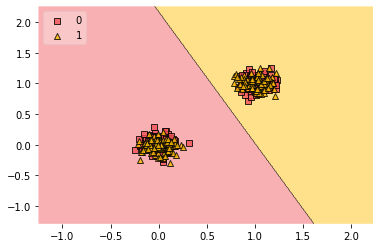

In [13]:
""" Enter your code for Question 3 here """

# Linear Regression or Kmeans or Perceptron
percept =  Perceptron(tol=1e-3, random_state=0)

percept.fit(data,target)
percept.score(data,target)  
target = np.array(target)
target = target.reshape((-1))
plot_decision_regions(data, target, clf=percept, legend=2,colors = '#F15156,#FFBD00')
plt.show()

# Visualize the performance of these models

#Fun Fact
In the United States, there are about 350 spoken languages. But programming languages has us beat with over 700 coding languages in use today! Only two countries have more languages, Papua New Guinea (836) and Indonesia (710).

Some programming languages, like Java, Python, and HTML, are more common, but others, like Rust and Kotlin, are used in very specific situations. The good news for programmers? Once you learn the big ones, the more niche languages come easily.

There exist esoteric programming languages which do not serve any specific purpose always, for example LOLCODE, Chef, Piet and Whitespace. An esoteric programming language is a programming language designed to test the boundaries of computer programming language design, as a proof of concept, as software art, as a hacking interface to another (procedural or functional) programming language, or as a joke. Such languages are often popular among hackers and hobbyists.

#Sneak peek into Week 2: Tensorflow for Neural Network Modeling

As usual, let's begin by importing the needed libraries: First,`TensorFlow`: it is an open source machine learning library for Python by Google. 

We also import `mlxtend`, a library used for various data science purposes. Here we have used it to visualize the learned boundaries of our neural network algorithm.

In [14]:
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions

We are using version 2.0 of Tensorflow. As of TensorFlow 2.0, Keras, which was a "wrapper" --- or abstraction layer creating ease of function use --- over TensorFlow 1.0, is fully incorporated in TensorFlow 2.0. 

A key function of Keras is the `models.Sequential()` function. You will use this function many times over the next several weeks. This function allows you to create neural network models layer-by-layer. 

Once you have instantiated a model using the `models.Sequential()` function, you can add each layer using `tf.kreas.models.add(tensor.shape)` in order to add a layer to the neural network.

For clarity and ease of reading, you can do the above two steps of model instantiation and layer definition as separate lines of code.  Or, you can instantiate the model and define the model layers in a single line of code.
```
tf.keras.models.Sequential(tf.keras.Input(shape),
                           tf.keras.layers.Dense(shape,activation),
                           tf.keras.layers.Dense(1,activation))
```

The two code blocks below builds and complies a simple model. Carefully read through each line of code and the accompanying comments to understand what is happening at each step. 

In [15]:
model = tf.keras.models.Sequential()
# we have chosen layers which gradually thin down to one output 
# as we want to find out if the data sample is in one class or other
# in other words our task is binary classification

model.add(tf.keras.Input(shape=(2))) #shape indicates how many dimensions
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    # Indicate the optimizer to use:
    # Optimizers are algorithms which minimize or maximize a mathematical expression
    # In this case the loss function
    # Other optimizers you can use are: Adam, SGD, Adagrad
    optimizer=tf.keras.optimizers.RMSprop(),  

    # Indicate the loss function to minimize:
    # A loss function at the most basic level evaluates how badly a neural network performed
    # i.e zero loss means perfect prediction 
    # The loss generated from a loss function is used by the optimizer 
    # to change the weights of a neuron to get better accuracy
    # We use Binary Cross Entropy as we want to classify between two classes
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor:
    # Metrics are a measure of performance of a neural network accuracy of classification
    # based on how well a model performs by predicting properly 
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)
print(data.shape)
# tf.keras.models.fit() is a function that handles training a neural network 
# training based on the hyperparameters defined in the network layers
# and in the optimizer, loss function and metrics defined
model.fit(data, target, epochs = 5, batch_size=data.shape[0])

(400, 2)
Epoch 1/5
1/1 [==============================] - 1s 660ms/step - loss: 0.6944 - binary_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 0.6926 - binary_accuracy: 0.5100
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 0.6924 - binary_accuracy: 0.5025
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 0.6922 - binary_accuracy: 0.5300


## Question 4
Compare the model in the code block below to the original deep model in the code block above. In the model below, we have added in 1 more layer and more nodes to the first 3 layers. And then we train the model for the same perieod as above, i.e., 5 epochs. ("Epoch" defines the number times that the learning algorithm will work through the entire training dataset.) 

Now consider **the loss** produced at each epoch during training the model above and the new model below. (Loss indicates the difference between model prediction and truth. Lower loss = better prediction). 

What is the effect of adding more layers and adding more nodes on the loss? Is the new model is likely to be more accurate than the original one above? 


Increasing epochs and layers decreases the loss significantly (from ~0.6 to 0.3). The newer model is more likely to be accurate than the above model. 

In [17]:
# Define and instantiate model layers
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2)))
#model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

# Define optimizers, loss function and metrics

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               600       
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 100)               15100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,951
Trainable params: 50,951
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit model 
model.fit(data, target, epochs = 5, batch_size=data.shape[0])

Epoch 1/5
1/1 [==============================] - 1s 578ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 0.6929 - binary_accuracy: 0.5300
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 0.6938 - binary_accuracy: 0.5150
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5200
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 0.6919 - binary_accuracy: 0.5200


<AxesSubplot:>

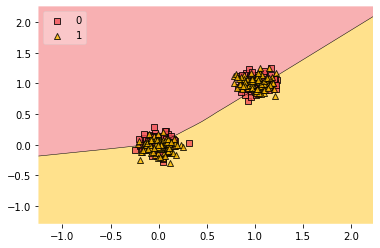

In [19]:
# Visualize learned boundaries
plot_decision_regions(data, target.reshape(-1), clf=model, legend=2, colors = '#F15156,#FFBD00')

## Question 5

If the answer to *Question 4* is *yes*, why do you think the new model is performing better than the original model? 

In the codeblock below, try adding one layer at a time and observe the effect of adding new layers. What do you think is the most number of layers, you can add to this model, to make it more accurate? 

About 6 layers can be added before the model peaks in a loss trough and begins to increase in loss again. The new model performs better because more layers allows the model to fit the data more accurately. The peak might be due to the model becoming overfit to the data (i.e. the model doesn't find a general rule for data like the given set, but comes up with a specific rule for this specific data)

In [22]:
""" Try out your code for Question 4 here """

# Define and instantiate model layers
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2)))

#try ADDING MORE LAYERS below and changing the number of nodes
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
#model.add(tf.keras.layers.Dense(200, activation='relu'))
#model.add(tf.keras.layers.Dense(200, activation='relu'))

#add the classification layer
model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.summary()

# Define optimizers, loss function and metrics

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

# Fit model 
model.fit(data, target, epochs = 5, batch_size=data.shape[0])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 200)               600       
                                                                 
 dense_23 (Dense)            (None, 300)               60300     
                                                                 
 dense_24 (Dense)            (None, 200)               60200     
                                                                 
 dense_25 (Dense)            (None, 200)               40200     
                                                                 
 dense_26 (Dense)            (None, 200)               40200     
                                                                 
 dense_27 (Dense)            (None, 1000)              201000    
                                                                 
 dense_28 (Dense)            (None, 1)                

## Question 6

Remember that this task, our goal was to separate the data into two classes (one class of yellow triangles and oen class of red squares.) 

Now look at the last layer of the model you build: `model.add(tf.keras.layers.Dense(1, activation='sigmoid'))`. 

It is the classification layer. Here we are are using a [`sigmoid` activation function](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6), and 1 output node. 

A sigmoid output is a probability. Since probability of anything exists only in the range of 0 and 1, sigmoid is the right choice for our dataset which only has two output targets (0 or 1). A threshold (or cutoff probability) defined by the model learns what probability it is being either class. 

Now consider another activation function `softmax`. It is a more generalized logistic activation function which is used for multi-class classification.

Now, try something in the code block above. Instead of `sigmoid`, if we were to replace it with `softmax`, what change would we need to make to number of neurons?

Do we need to use softmax for this problem or is sigmoid sufficient? Why?

\<*Type your answer here*\>
Model's 5th epoch accuracy with..
sigmoid = 0.5725
softmax = 0.5000

This task is binary classification: either the data being examined is one class, or it's the other. Caluclating the probability of one event gives you the probability of both; P(x) = 1-P(x'). So, softmax is unnecessary, and actually results in lower accuracy in this case. 

# **Upload this Day 3 Colab Notebook to your Github repository under "Day 3" folder. Also add your *Reflection* on today's learning in README.md**

# Bonus: Trying out different data distributions

## Dataset 1 - Composite XOR

This is made of four XOR distributions centered at `(0.5, 0.5), (2.5, 0.5), (0.5, 2.5), (2.5, 2.5)`. Their composition is centered at `(1.5, 1.5)`. 

In [ ]:
data = []
target = []

for i in range(4):
  for j in range(4):
    for _ in range(50):
      if (i+j)%2==0:
        data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1) + j])
        target.append([0])
      else:  
        data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1)+ j] )
        target.append([1])

for i in range(len(data)):
    if target[i][0] == 0:
        plt.scatter(data[i][0] ,data[i][1] , c='#F15156', marker = 's', edgecolor = 'black')
    else:
        plt.scatter(data[i][0] ,data[i][1] , c='#FFBD00', marker = '^', edgecolor = 'black')

plt.show()

In [ ]:
data = np.array(data)
target = np.array(target)



##Bonus Question 1

Use everything you have learned so far to make a neural network as deep as needed to gain an optimal accuracy on the above 4X4 dataset.

In a 3x3* XOR dataset , 90% accuracy should be reachable in 15 epochs; 20 epochs are also acceptable. Try to reach similar accuracy in accuracy in 4x4. What is number of epochs it takes you to reach that accuracy?

*Note: If you are interested, you can easily create a 3X3 dataset by removing the innermost loop in the codeblock above that creates the 4x4 dataset. Note the difference in hyperparameters which can reach optimal accuracy. 


In [ ]:
""" Create a neural network workflow similar to the one used above 
    You may use plot_decision_regions() to visualize the decision boundaries """

## Bonus Question 2

Look at the visualization above. Observe the hyperparameters. What do you think about the placement of the red squares in the red space? How many clusters are in the right place? How many are not? This gives you an estimate of the accuracy of the model. 

Do you think training the model for more epochs will produce greater accuracy? How about adding more layers? Try it out.

Share your thoughts what will help you get greater accuracy.

\<*Type your answer here*\>

## Dataset 2 - Concentric Rings

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
# generate 2d classification dataset
data, target = make_circles(n_samples=500, noise=0.1, factor = 0.5)

for i in range(len(data)):
    if target[i] == 0:
        plt.scatter(data[i][0] ,data[i][1] , c='#F15156', marker = 's', edgecolor = 'black')
    else:
        plt.scatter(data[i][0] ,data[i][1] , c='#FFBD00', marker = '^', edgecolor = 'black')

plt.show()

##Bonus Question 3

Use everything you have learned so far to make a neural network as deep/shallow as needed to gain an optimal accuracy on the above dataset of XOR data in concentric circles.

This sort of dataset is not difficult to get a good accuracy on, but the task on this question is that you must make it as less compute intensive as possible.

In [ ]:
""" Create a neural network workflow similar to the one used above 
    You may use plot_decision_regions() to visualize the decision boundaries """

## Bonus Question 4

Look at the visualization above. Observe the hyperparameters. What do you think about the placement of the red squares in the red space? 

Estimate what percent are not in the right space? Do you think training the model for more epochs will produce greater accuracy? How about adding more layers? Try it out.

Share your thoughts what will help you get greater accuracy.


\<*Type your answer here*\>

Sources: 

https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7
https://www.tensorflow.org/guide/keras/train_and_evaluate#the_compile_method_specifying_a_loss_metrics_and_an_optimizer
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-9-customizing-the-plotting-style